# **Machine Learning Model to Predict Credit Card Default Customers**
The following script details a step-by-step approach for applying a Machine Learning solution to predict if a credit card customer will default the following month based on their 6 months payment history.

The dataset considered is from UCI Machine Learning Repository- "
default of credit card clients Data Set" (Also available in Kaggle)

Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

### **Stages**
1. Import Libraries Required
2. Get Data
3. Data Examination
4. Exploratory Data Analysis (EDA)
5. Pre-processing Steps
6. Baseline Model Implementation
7. Evaluation
8. Final Model Implementation

## **1. Import Libraries required**

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder



## **2. Get Data**

In [4]:
# Reading the data
df = pd.read_csv('credit_card_default.csv')

In [4]:
df.shape

(30000, 25)

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment_next_month'],
      dtype='object')

## **3. Data Examination**

In [6]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
# Ensuring there are no missing values

df.isnull().sum().sort_values(ascending=False) 

# No missing values and hence no imputations necessary

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default payment_next_month    0
dtype: int64

### Observations
There are no missing values which is a good sign.
However, there are some minor preprocessing steps required. 


*   I will change the column name 'default payment_next_month' to 'default_payment' to make is easy to read. This will be done in pre-processing stage.
*   Will change the column name 'PAY_0' to 'PAY_1' so its consistent. This will be done in pre-processing stage.
* The columns Marriage, Education and Sex are categorical variables but there are some anomalous data. This will be demonstrated and addressed in pre-processing stage.






## **4. Exploratory Data Analysis (EDA)**

In [9]:
# Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Observations from the descriptive stats
* Mean value for credit card credit limit is 167,484. Standard deviation is quite high.
* By looking at the target column (default_payment_next_month), it seems data is imbalanced with 78:22 ration.
*35.5 years is the average age of the credit card customers with 9.2 standard deviation


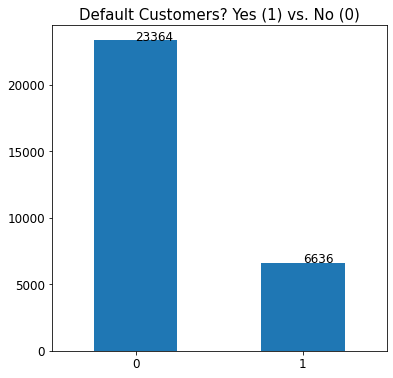

In [11]:
# Dataset Target Class Imbalance
class_cnt = df['default payment_next_month'].value_counts()
class_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Default Customers? Yes (1) vs. No (0)", fontsize=15)
for x,y in zip([0,1],class_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

78% of the customers are not going to default and 22% of the customers are going to default next month.

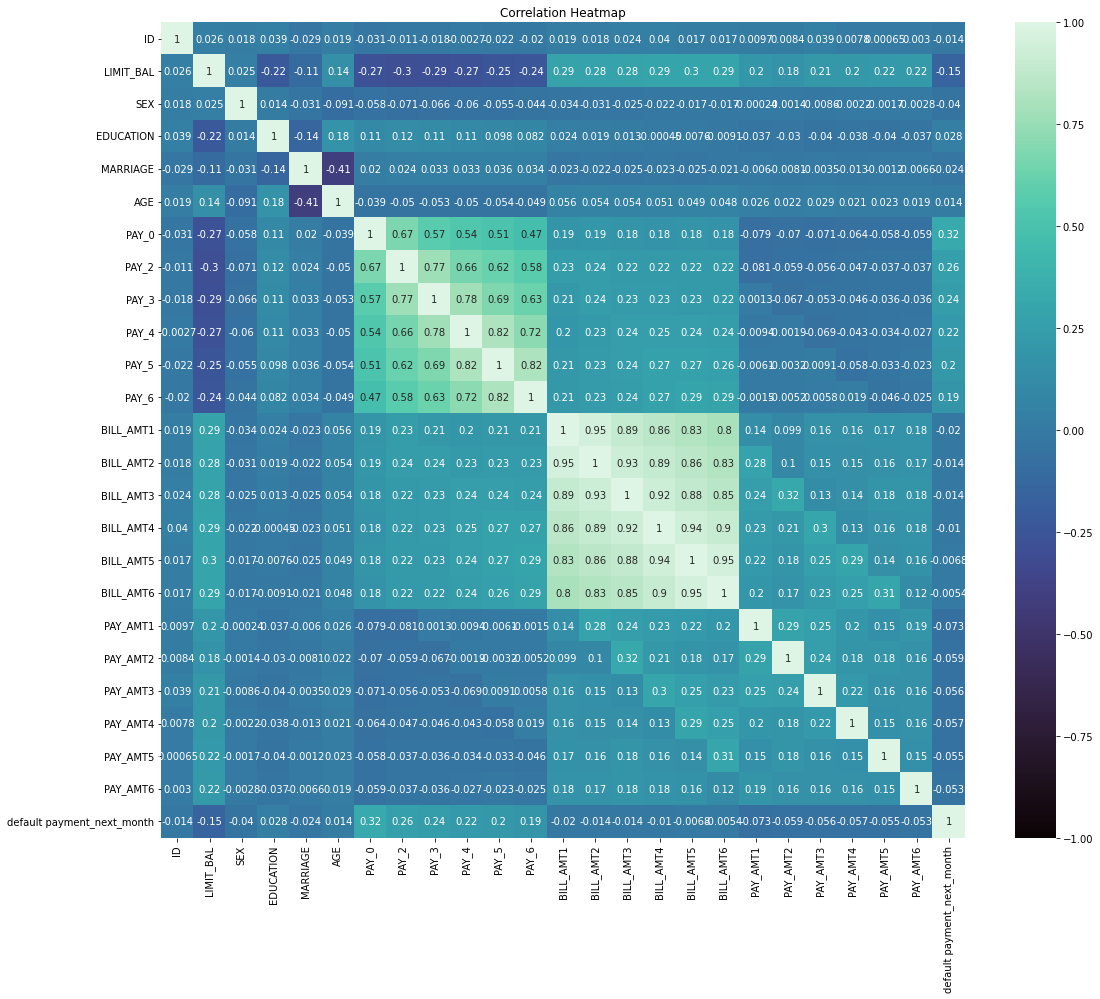

In [12]:
# Checking the correlation for each variables
corr = df.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

### Observations
* Ignore the ID column as it does not say much insoghts
* BILL_AMT1 to BILL_AMT6 seems to be highly correlated than other variable of teh dataset
* Variables PAY_0 to PAY_6 is shows how late the customer is late in payments
* Age and Marriage is negatively correlated  but they are categorical/ ordinal so ignoring that.

In [13]:
# Checking the Value counts for categorical variables

df['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [14]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [15]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

### Observation from checking value counts 
* Education: As per the data description, there are only 4 categories so 5,6,0 is something new. So that those instances needs to be merged with 4 which is actucally classed as 'Others'. This will be done in the pre-processing stage.
* Marriage: Again here, there is no description for 0. Hence this will be merged with 3 as it is described as 'Others'. This will be done in the pre-processing stage.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


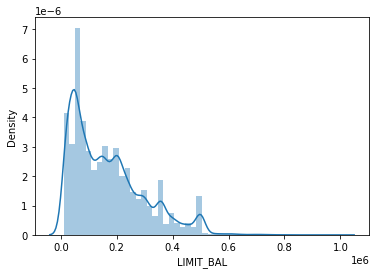

In [16]:
sns.distplot(df['LIMIT_BAL'])

In [44]:
feature_names = df.columns
feature_names

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment'],
      dtype='object')

## **5. Pre-Processing Steps**
Based on the exploration and analysis above, in this stage I will start to transform the data and apply some pre-processing steps such as standard scaling, One Hot Encoder and basic renaming of columns etc...

In [17]:
# Renaming some of the columns for consistency and readability

df.rename(columns={'default payment_next_month':'default_payment'}, 
          inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [18]:
# Re-assigning the values for the categorical variables Marriage and Education as per the data dictionary
fill = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fill, 'EDUCATION'] = 4
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

In [19]:
#Using the one hot encoder for the marriage and education columns as they are nominal features and they cannot be ordered in a meaningful way.
#Because the model might not take these values as categorical so the one hot encoder will create seperate columns for each values for these columns

#each unique value as its own column and own feature
def onehot_encode(data, column_dict):
    data = data.copy()
    
    for column, prefix in column_dict.items():
        dummies= pd.get_dummies(data[column], prefix= prefix) #using get dummies to create columns
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [20]:
def preprocess_inputs(data):
    data = data.copy()
    
    # Drop 'ID' column- This is not giving any useful info as this is just an ID column
    data = data.drop('ID', axis = 1)
    
    data = onehot_encode(
    data,
    {
        'EDUCATION': 'EDU',
        'MARRIAGE': 'MAR'
    }
    )
    
    #Splitting the data to X, y
    y = data['default_payment'].copy()
    X = data.drop('default_payment', axis = 1).copy()
    
    # Scaling the data to take similar range of values as the data is not scaled. Standardise column
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
    
    return X, y

In [21]:
X, y = preprocess_inputs(df)

In [22]:
{column: len(X[column].unique()) for column in X.columns}

{'AGE': 56,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'EDU_1': 2,
 'EDU_2': 2,
 'EDU_3': 2,
 'EDU_4': 2,
 'LIMIT_BAL': 81,
 'MAR_1': 2,
 'MAR_2': 2,
 'MAR_3': 2,
 'PAY_1': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'SEX': 2}

## **6. Baseline Model**
I will now begin to build some baseline models to see how this performs and what results I get. Based on this baseline, I can then see what further steps I will need to take to for the final model such as feature selection, optimisation, cross validation, Hyperparameter tuning etc...


### Train Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=101)

### 6a. Logistic Regression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [25]:
log_predictions = logmodel.predict(X_test)

In [26]:
logmodel.score(X_test,y_test)*100

81.30416666666666

### 6b. Support Vector Machine (SVM)

In [27]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [28]:
svm_predictions = svm_model.predict(X_test)

In [29]:
svm_model.score(X_test,y_test)*100

82.0125

### 6c. Random Forest

In [30]:
rfc_model = RandomForestClassifier(n_estimators=300)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [31]:
rfc_predictions = rfc_model.predict(X_test)

In [102]:
rfc_model.score(X_test,y_test)*100

81.50833333333334

### 6d. K- Nearest Neighbors

In [32]:
knnclassifier=KNeighborsClassifier(n_neighbors=8,algorithm='auto',
                                    leaf_size=30,metric='minkowski')
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
knn_predictions= knnclassifier.predict(X_test)

In [34]:
knnclassifier.score(X_test, y_test)*100

79.84166666666667

### 6e. MLP Classifier

In [35]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [39]:
mlp_predictions= mlp_model.predict(X_test)

In [40]:
mlp_model.score(X_test, y_test)*100

80.38333333333333

## **7. Evaluation**
In this stage, I will apply some model evaluation techniques to advise my final model with best accuracy scores and performance. I will also look at some hypertuning parameters on individual models to evaluate if that will help the model to perform better.

### 7a. Individual Model Evaluation steps
Here I will use some standard model evaluation steps such as Confusion Matrix, Accuracy, F1 score, Precision, Recall and Specificity and Sensitivity

Logistic Regression Classifier Evaluation

In [36]:
# Classification report and Confusion Matrix
print(classification_report(y_test,log_predictions))
log_cm = confusion_matrix(y_test,log_predictions)
print(log_cm)

#Precision and Recall
log_recall= recall_score(y_test, log_predictions, pos_label=0)*100
print(f"Recall:{log_recall}")

log_precision= precision_score(y_test, log_predictions, pos_label=0)
print(f"Precision:{log_precision}")

#Accuracy Score
print(accuracy_score(y_test, log_predictions)*100)

#F1 score
print(f1_score(y_test, log_predictions, pos_label=0)*100)

#Sensitivity and Specificity
log_sensitivity = log_cm[0,0]/(log_cm[0,0]+log_cm[1,0])
print(f"Sensitivity:{log_sensitivity}")

log_specificity = log_cm[1,1]/(log_cm[1,1]+log_cm[0,1])
print(f"Specificity:{log_specificity}")

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18735
           1       0.71      0.25      0.37      5265

    accuracy                           0.81     24000
   macro avg       0.77      0.61      0.63     24000
weighted avg       0.80      0.81      0.78     24000

[[18205   530]
 [ 3957  1308]]
Recall:97.17107018948492
Precision:0.8214511325692627
81.30416666666666
89.0285351003741
Sensitivity:0.8214511325692627
Specificity:0.7116430903155604


SVM Classifier Evaluation

In [37]:
# Classification report and Confusion Matrix
print(classification_report(y_test,svm_predictions))
svm_cm= confusion_matrix(y_test,svm_predictions)
print(svm_cm)

#Precision and Recall
svm_recall = recall_score(y_test, svm_predictions, pos_label=0)*100
print(f"Recall:{svm_recall}")

svm_precision= precision_score(y_test, svm_predictions, pos_label=0)
print(f"Precision:{svm_precision}")

#Accuracy Score
print(accuracy_score(y_test, svm_predictions)*100)

#F1 score
print(f1_score(y_test, svm_predictions, pos_label=0)*100)

#Sensitivity and Specificity
svm_sensitivity = svm_cm[0,0]/(svm_cm[0,0]+svm_cm[1,0])
print(f"Sensitivity:{svm_sensitivity}")

svm_specificity = svm_cm[1,1]/(svm_cm[1,1]+svm_cm[0,1])
print(f"Specificity:{svm_specificity}")


              precision    recall  f1-score   support

           0       0.83      0.96      0.89     18735
           1       0.69      0.32      0.44      5265

    accuracy                           0.82     24000
   macro avg       0.76      0.64      0.67     24000
weighted avg       0.80      0.82      0.79     24000

[[17978   757]
 [ 3560  1705]]
Recall:95.9594342140379
Precision:0.8347107438016529
82.0125
89.28065949891987
Sensitivity:0.8347107438016529
Specificity:0.6925264012997563


Random Forest Classifier Evaluation

In [38]:
#Classification report and Confusion Matrix
print(classification_report(y_test,rfc_predictions))
rfc_cm = confusion_matrix(y_test,rfc_predictions)
print(rfc_cm)

#Precision and Recall
rfc_recall= recall_score(y_test, rfc_predictions, pos_label=0)*100
print(f"Recall:{rfc_recall}")

rfc_precision= precision_score(y_test, rfc_predictions, pos_label=0)
print(f"Precision:{rfc_precision}")

#Accuracy Score
print(accuracy_score(y_test, rfc_predictions)*100)

#F1 Score
print(f1_score(y_test, rfc_predictions, pos_label=0)*100)

#Sensitivity and Specificity
rfc_sensitivity = rfc_cm[0,0]/(rfc_cm[0,0]+rfc_cm[1,0])
print(f"Sensitivity:{rfc_sensitivity}")

rfc_specificity = rfc_cm[1,1]/(rfc_cm[1,1]+rfc_cm[0,1])
print(f"Specificity:{rfc_specificity}")

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     18735
           1       0.63      0.37      0.46      5265

    accuracy                           0.81     24000
   macro avg       0.74      0.65      0.68     24000
weighted avg       0.79      0.81      0.79     24000

[[17600  1135]
 [ 3329  1936]]
Recall:93.94182012276488
Precision:0.840938410817526
81.39999999999999
88.74546187979023
Sensitivity:0.840938410817526
Specificity:0.6304135460761967


In [45]:
# Feature Importance
sorted(zip(rfc_model.feature_importances_, feature_names), reverse=True) 


[(0.09602327139222429, 'EDUCATION'),
 (0.06727267457056064, 'SEX'),
 (0.05881862231545672, 'ID'),
 (0.05849220889164241, 'PAY_4'),
 (0.05330974826960138, 'PAY_5'),
 (0.05231614102628997, 'BILL_AMT4'),
 (0.049132799118629146, 'BILL_AMT3'),
 (0.04882962080001014, 'PAY_6'),
 (0.048720235158924596, 'BILL_AMT1'),
 (0.0485537238273256, 'BILL_AMT2'),
 (0.04834512967848685, 'BILL_AMT5'),
 (0.044140464986565014, 'BILL_AMT6'),
 (0.04413593900870667, 'MARRIAGE'),
 (0.04355793253052674, 'PAY_AMT1'),
 (0.04305813529717559, 'PAY_AMT2'),
 (0.04237823085763811, 'PAY_AMT3'),
 (0.025823808780619347, 'AGE'),
 (0.0246121084444218, 'PAY_2'),
 (0.022798017858364543, 'PAY_3'),
 (0.0177777104248807, 'PAY_1'),
 (0.012965069924929623, 'LIMIT_BAL'),
 (0.010046281343205916, 'PAY_AMT5'),
 (0.009022499452973481, 'PAY_AMT4'),
 (0.008083262059681013, 'PAY_AMT6'),
 (0.0009425759621380864, 'default_payment')]

KNN Classifier Evaluation

In [41]:
#Classification report and Confusion Matrix
print(classification_report(y_test,knn_predictions))
knn_cm = confusion_matrix(y_test,knn_predictions)
print(knn_cm)

#Precision and Recall
knn_recall= recall_score(y_test, knn_predictions, pos_label=0)*100
print(f"Recall:{knn_recall}")

knn_precision= precision_score(y_test, knn_predictions, pos_label=0)
print(f"Precision:{knn_precision}")

#Accuracy Score
print(accuracy_score(y_test, knn_predictions)*100)

#F1 score
print(f1_score(y_test, knn_predictions, pos_label=0)*100)

#Sensitivity and Specificity
knn_sensitivity = knn_cm[0,0]/(knn_cm[0,0]+knn_cm[1,0])
print(f"Sensitivity:{knn_sensitivity}")

knn_specificity = knn_cm[1,1]/(knn_cm[1,1]+knn_cm[0,1])
print(f"Specificity:{knn_specificity}")

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     18735
           1       0.61      0.23      0.33      5265

    accuracy                           0.80     24000
   macro avg       0.71      0.59      0.61     24000
weighted avg       0.77      0.80      0.76     24000

[[17964   771]
 [ 4067  1198]]
Recall:95.88470776621297
Precision:0.8153964867686442
79.84166666666667
88.1322670853162
Sensitivity:0.8153964867686442
Specificity:0.6084306754697816


MLP Classifier Evaluation

In [44]:
#Classification report and Confusion Matrix
print(classification_report(y_test,mlp_predictions))
mlp_cm = confusion_matrix(y_test,mlp_predictions)
print(mlp_cm)

#Precision and Recall
mlp_recall= recall_score(y_test, mlp_predictions, pos_label=0)*100
print(f"Recall:{mlp_recall}")
mlp_precision= precision_score(y_test, mlp_predictions, pos_label=0)
print(f"Precision:{mlp_precision}")

# Accuracy Score
print(accuracy_score(y_test, mlp_predictions)*100)

#F1 score
print(f1_score(y_test, mlp_predictions, pos_label=0)*100)

#Sensitivity and Specificity
mlp_sensitivity = mlp_cm[0,0]/(mlp_cm[0,0]+mlp_cm[1,0])
print(f"Sensitivity:{mlp_sensitivity}")

mlp_specificity = mlp_cm[1,1]/(mlp_cm[1,1]+mlp_cm[0,1])
print(f"Specificity:{mlp_specificity}")

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     18735
           1       0.57      0.40      0.47      5265

    accuracy                           0.80     24000
   macro avg       0.71      0.66      0.67     24000
weighted avg       0.78      0.80      0.79     24000

[[17134  1601]
 [ 3157  2108]]
Recall:91.45449693087804
Precision:0.8444137795081563
80.175
87.80812791472353
Sensitivity:0.8444137795081563
Specificity:0.568347263413319


### 7b. Cross Validation: Combined Evaluation

In [42]:
print(cross_val_score(LogisticRegression(), X, y, cv=10)*100)
print(cross_val_score(SVC(), X, y, cv=10)*100)
print(cross_val_score(MLPClassifier(), X, y, cv=10)*100)
print(cross_val_score(RandomForestClassifier(), X, y, cv=10)*100)
print(cross_val_score(KNeighborsClassifier(), X, y, cv=10)*100)

[80.3        80.03333333 80.83333333 80.4        81.16666667 81.76666667
 82.33333333 80.8        81.2        81.36666667]
[80.76666667 80.73333333 81.56666667 80.9        81.7        82.6
 83.7        82.9        82.43333333 82.2       ]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

[80.43333333 80.4        80.93333333 79.93333333 80.9        81.86666667
 82.2        81.33333333 81.53333333 81.13333333]
[80.7        80.63333333 80.9        80.2        81.86666667 82.4
 83.13333333 83.1        82.66666667 82.        ]
[77.8        79.7        78.4        78.33333333 79.93333333 79.13333333
 80.66666667 79.7        80.06666667 80.23333333]


### 7c. Hypertuning Parameters using GridSearch CV: Combined Evaluation

In [43]:
combi_model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [5,7,10],
            'kernel': ['rbf','sigmoid']
        }  
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,5,7],
            'metric' : ['euclidean', 'manhattan']
        }
    }
}

In [64]:
final_scores = []

for model_name, mp in combi_model_params.items():
    final_clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    final_clf.fit(X, y)
    final_scores.append({
        'model': model_name,
        'best_score': final_clf.best_score_,
        'best_params': final_clf.best_params_
    })
    
mod_choice = pd.DataFrame(final_scores,columns=['model','best_score','best_params'])
mod_choice

,model,best_score,best_params
0,svm,0.818367,"{'C': 5, 'kernel': 'rbf'}"
1,knn,0.800467,"{'metric': 'euclidean', 'n_neighbors': 7}"


### 7d. ROC and AUC: Combined Evaluation

In [61]:

#SVM
svm_roc = svm_model.decision_function(X_test)

#KNN Classifier
knn_roc = knnclassifier.predict_proba(X_test)

#Logistic Regression
log_roc = logmodel.decision_function(X_test)



In [62]:
svm_roc_auc = roc_auc_score(y_test,svm_model.predict(X_test))
knn_roc_auc = roc_auc_score(y_test,knnclassifier.predict(X_test))
log_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))


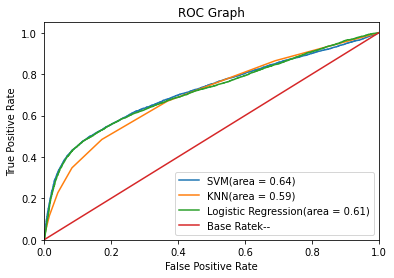

In [63]:
#plot ROC and compare AUC

from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_model.decision_function(X_test))


knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knnclassifier.predict_proba(X_test)[:,1])

log_fpr, log_tpr, thresholds = roc_curve(y_test, logmodel.decision_function(X_test))

plt.figure()
plt.plot(svm_fpr, svm_tpr, label='SVM(area = %0.2f)' % svm_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN(area = %0.2f)' % knn_roc_auc)
plt.plot(log_fpr, log_tpr, label='Logistic Regression(area = %0.2f)' % log_roc_auc)

plt.plot([0,1], [0,1], label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()